In [23]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [24]:
with open('data/Tree1_v3.json', 'r') as f:
    trials = [json.loads(line) for line in f]

df = pd.DataFrame(trials)
df

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2
0,wdf61453,"[-7, -2, -3]","[-4, -3]","[-3, 2, 0]",2,3,5060.0,1976.0,7036,3.0,3,-1.0
1,wdf61453,"[-8, -2, 5]","[-4, 4]","[-4, 2, 1]",2,3,2127.0,5453.0,7580,10.0,10,-1.0
2,wdf61453,"[-5, -3, 5]","[-4, 2]","[-1, 1, 3]",2,3,2495.0,1769.0,4264,9.0,9,-1.0
3,wdf61453,"[-6, 0, 7]","[-2, 3]","[-4, 2, 4]",2,3,2266.0,1665.0,3931,10.0,10,-1.0
4,wdf61453,"[2, -2, -6]","[1, -4]","[1, -3, -2]",1,1,3041.0,2981.0,6022,6.0,6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4767,w18b16aa,"[-2, -6, 6]","[-3, 2]","[1, -3, 4]",2,3,2145.0,288.0,2433,10.0,10,-1.0
4768,w18b16aa,"[-5, 1, 4]","[-3, 1]","[-2, 4, 3]",2,3,1977.0,249.0,2226,6.0,6,-1.0
4769,w18b16aa,"[0, -2, 2]","[2, 2]","[-2, -4, 0]",2,3,3686.0,229.0,3915,3.0,3,-1.0
4770,w18b16aa,"[-5, -3, 6]","[-2, 3]","[-3, -1, 3]",1,2,1875.0,1788.0,3663,10.0,10,2.0


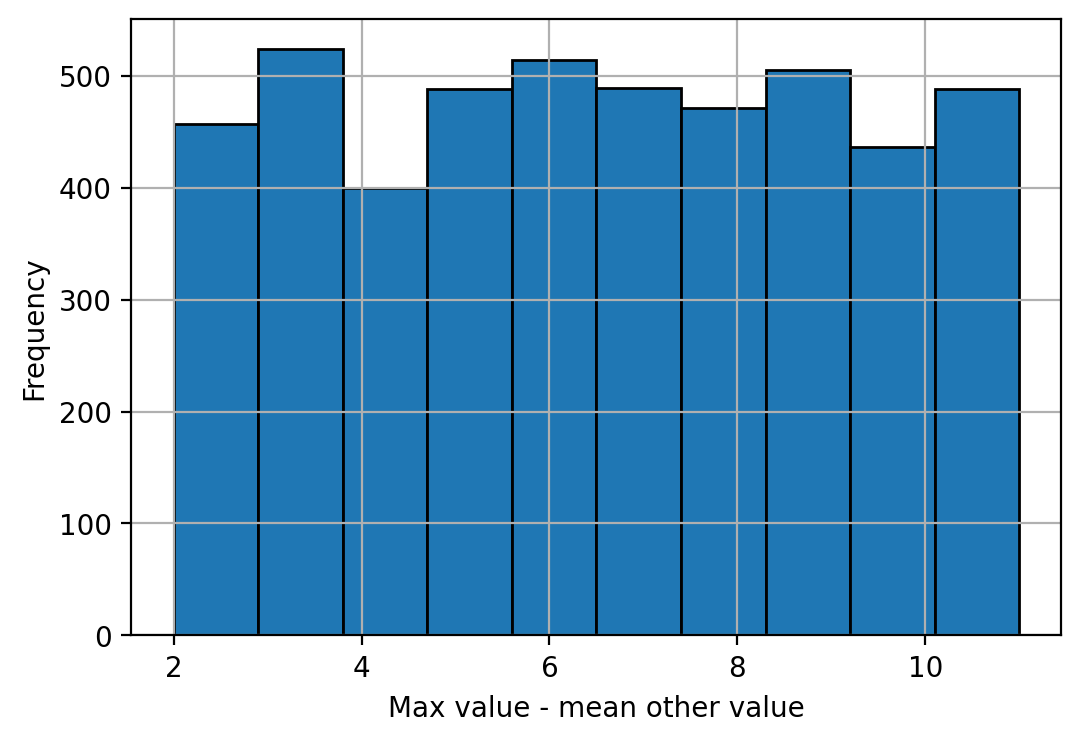

In [38]:
plt.figure(figsize=(6, 4))
plt.hist(df['difficulty'], edgecolor='black', density=False)
plt.xlabel("Max value - mean other value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [26]:
# first stage accuracy
df['best_path_idx'] = df['rewards'].apply(lambda v: int(np.argmax(v)))
df['correct1'] = df.apply(
    lambda r: (r['best_path_idx'] < 2 and r['choice1'] == 1)
              or (r['best_path_idx'] >= 2 and r['choice1'] == 2),
    axis=1
)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,best_path_idx,correct1
0,wdf61453,"[-7, -2, -3]","[-4, -3]","[-3, 2, 0]",2,3,5060.0,1976.0,7036,3.0,3,-1.0,1,False
1,wdf61453,"[-8, -2, 5]","[-4, 4]","[-4, 2, 1]",2,3,2127.0,5453.0,7580,10.0,10,-1.0,2,True
2,wdf61453,"[-5, -3, 5]","[-4, 2]","[-1, 1, 3]",2,3,2495.0,1769.0,4264,9.0,9,-1.0,2,True
3,wdf61453,"[-6, 0, 7]","[-2, 3]","[-4, 2, 4]",2,3,2266.0,1665.0,3931,10.0,10,-1.0,2,True
4,wdf61453,"[2, -2, -6]","[1, -4]","[1, -3, -2]",1,1,3041.0,2981.0,6022,6.0,6,4.0,0,True


In [27]:
def subtree_vals(path_value, choice1):

    if choice1 == 1:
        return path_value[0:2]
    else:
        return [path_value[2]]

df['correct2'] = df.apply(
    lambda r: (
        r['value2'][r['choice2'] - 1]
        == max(subtree_vals(r['value2'], r['choice1']))
    ),
    axis=1
)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,best_path_idx,correct1,correct2
0,wdf61453,"[-7, -2, -3]","[-4, -3]","[-3, 2, 0]",2,3,5060.0,1976.0,7036,3.0,3,-1.0,1,False,True
1,wdf61453,"[-8, -2, 5]","[-4, 4]","[-4, 2, 1]",2,3,2127.0,5453.0,7580,10.0,10,-1.0,2,True,True
2,wdf61453,"[-5, -3, 5]","[-4, 2]","[-1, 1, 3]",2,3,2495.0,1769.0,4264,9.0,9,-1.0,2,True,True
3,wdf61453,"[-6, 0, 7]","[-2, 3]","[-4, 2, 4]",2,3,2266.0,1665.0,3931,10.0,10,-1.0,2,True,True
4,wdf61453,"[2, -2, -6]","[1, -4]","[1, -3, -2]",1,1,3041.0,2981.0,6022,6.0,6,4.0,0,True,True


In [28]:
# 6. Overall correctness
df['correct_all'] = df['correct1'] & df['correct2']
df.tail()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,best_path_idx,correct1,correct2,correct_all
4767,w18b16aa,"[-2, -6, 6]","[-3, 2]","[1, -3, 4]",2,3,2145.0,288.0,2433,10.0,10,-1.0,2,True,True,True
4768,w18b16aa,"[-5, 1, 4]","[-3, 1]","[-2, 4, 3]",2,3,1977.0,249.0,2226,6.0,6,-1.0,2,True,True,True
4769,w18b16aa,"[0, -2, 2]","[2, 2]","[-2, -4, 0]",2,3,3686.0,229.0,3915,3.0,3,-1.0,2,True,True,True
4770,w18b16aa,"[-5, -3, 6]","[-2, 3]","[-3, -1, 3]",1,2,1875.0,1788.0,3663,10.0,10,2.0,2,False,True,False
4771,w18b16aa,"[-4, -6, 5]","[-2, 1]","[-2, -4, 4]",2,3,1893.0,420.0,2313,10.0,10,-1.0,2,True,True,True


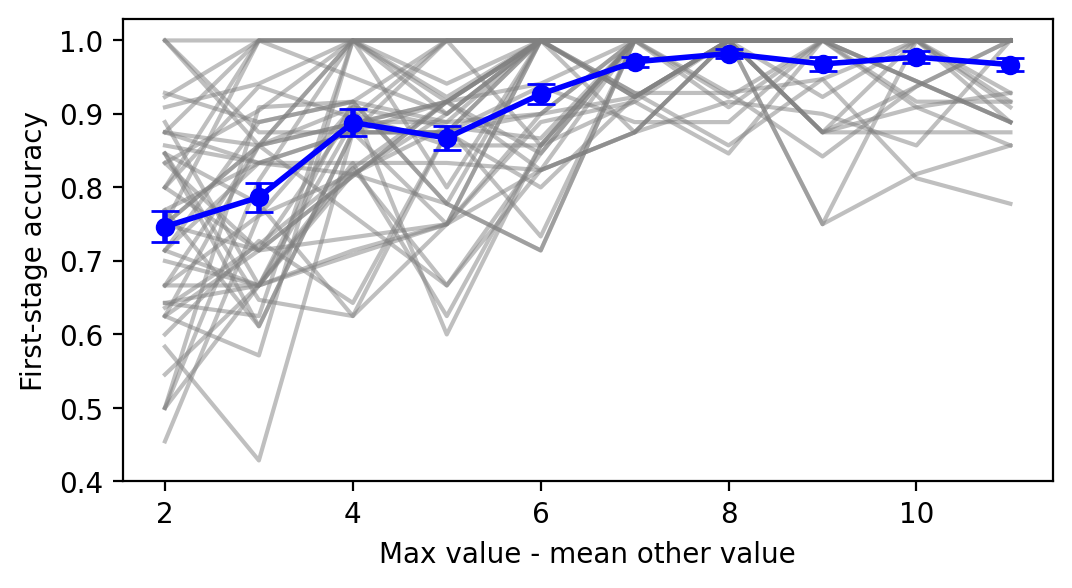

In [29]:
per1 = (
    df.groupby(['wid','diff1'])['correct1']
      .mean()
      .reset_index(name='accuracy1')
)

# 2. Compute group‐level mean and SEM
stats = (
    per1.groupby('diff1')['accuracy1']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot each subject in gray
for _, grp in per1.groupby('wid'):
    ax.plot(grp['diff1'], grp['accuracy1'], color='gray', alpha=0.5)

# Overlay group‐level mean ± SEM in black
ax.errorbar(
    stats['diff1'],
    stats['mean'],
    yerr=stats['sem'],
    color='blue',
    marker='o',
    linewidth=2,
    capsize=5
)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('First-stage accuracy')
# ax.set_title('First-Stage Accuracy vs. diff1\n'
#              '(Individual subjects: gray; Group mean ± SEM: black)')
plt.show()

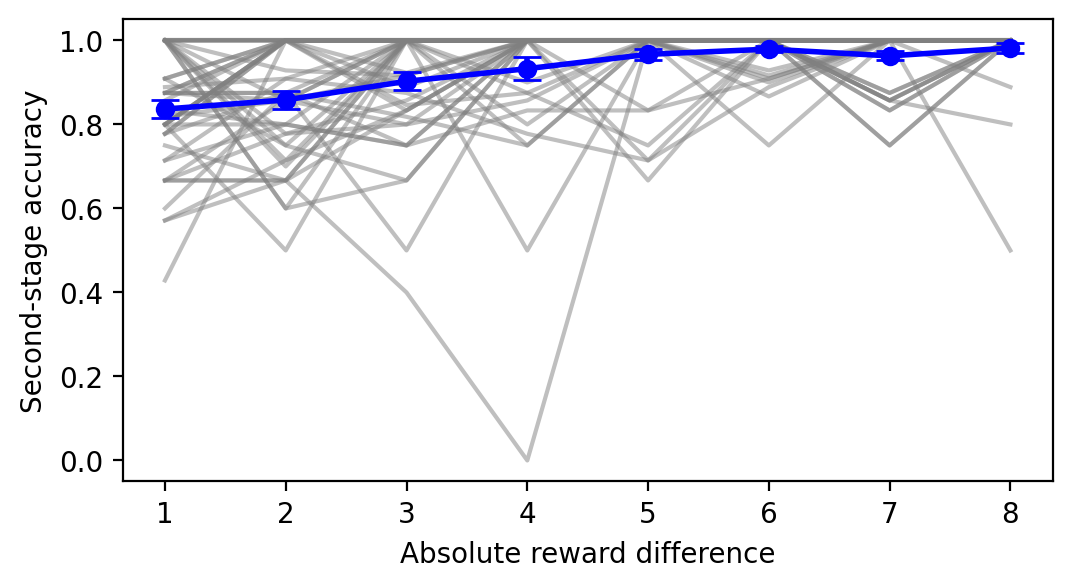

In [30]:
subdf = df.copy()
subdf = subdf[subdf['diff2'] != -1]

# b) Second‐stage accuracy by diff2
per2 = (
    subdf.groupby(['wid','diff2'])['correct2']
      .mean()
      .reset_index(name='accuracy2')
)

# 2. Compute group‐level mean and SEM
stats = (
    per2.groupby('diff2')['accuracy2']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot each subject in gray
for _, grp in per2.groupby('wid'):
    ax.plot(grp['diff2'], grp['accuracy2'], color='gray', alpha=0.5)

# Overlay group‐level mean ± SEM in black
ax.errorbar(
    stats['diff2'],
    stats['mean'],
    yerr=stats['sem'],
    color='blue',
    marker='o',
    linewidth=2,
    capsize=5
)

ax.set_xlabel('Absolute reward difference')
ax.set_ylabel('Second-stage accuracy')
# ax.set_title('First-Stage Accuracy vs. diff1\n'
#              '(Individual subjects: gray; Group mean ± SEM: black)')
plt.show()

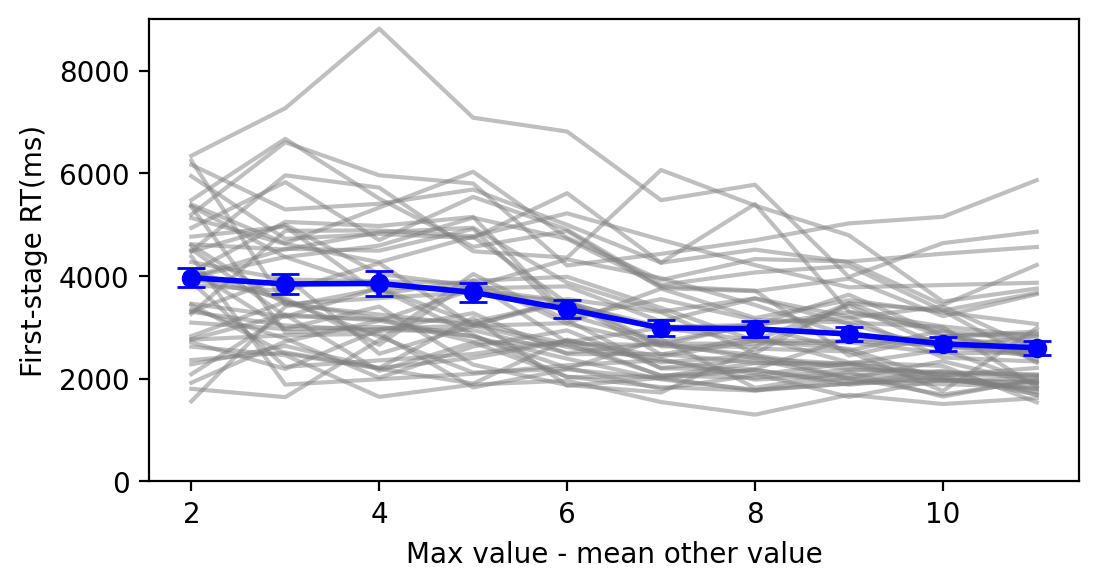

In [31]:
# c) First‐stage RT (mean) for correct trials by diff1
rt1 = (
    df[df['correct1']]
      .groupby(['wid','diff1'])['rt1']
      .mean()
      .reset_index(name='mean_rt1')
)

# 2. Compute group‐level mean and SEM
stats = (
    rt1.groupby('diff1')['mean_rt1']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot each subject in gray
for _, grp in rt1.groupby('wid'):
    ax.plot(grp['diff1'], grp['mean_rt1'], color='gray', alpha=0.5)

# Overlay group‐level mean ± SEM in black
ax.errorbar(
    stats['diff1'],
    stats['mean'],
    yerr=stats['sem'],
    color='blue',
    marker='o',
    linewidth=2,
    capsize=5
)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('First-stage RT(ms)')
# ax.set_title('First-Stage Accuracy vs. diff1\n'
#              '(Individual subjects: gray; Group mean ± SEM: black)')
plt.ylim(0, 9000)
plt.show()

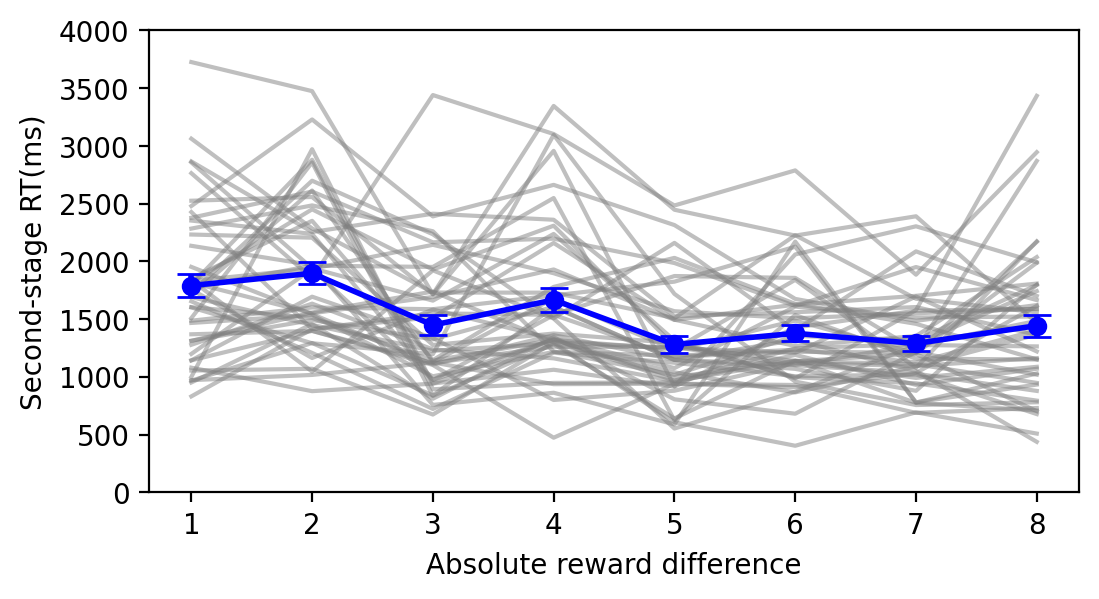

In [32]:
subdf = df.copy()
subdf = subdf[subdf['diff2'] != -1]

# d) Second‐stage RT (mean) for correct trials by diff2
rt2 = (
    subdf[subdf['correct2']]
      .groupby(['wid','diff2'])['rt2']
      .mean()
      .reset_index(name='mean_rt2')
)

# 2. Compute group‐level mean and SEM
stats = (
    rt2.groupby('diff2')['mean_rt2']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot each subject in gray
for _, grp in rt2.groupby('wid'):
    ax.plot(grp['diff2'], grp['mean_rt2'], color='gray', alpha=0.5)

# Overlay group‐level mean ± SEM in black
ax.errorbar(
    stats['diff2'],
    stats['mean'],
    yerr=stats['sem'],
    color='blue',
    marker='o',
    linewidth=2,
    capsize=5
)

ax.set_xlabel('Absolute reward difference')
ax.set_ylabel('Second-stage RT(ms)')
# ax.set_title('First-Stage Accuracy vs. diff1\n'
#              '(Individual subjects: gray; Group mean ± SEM: black)')
plt.ylim(0, 4000)
plt.show()

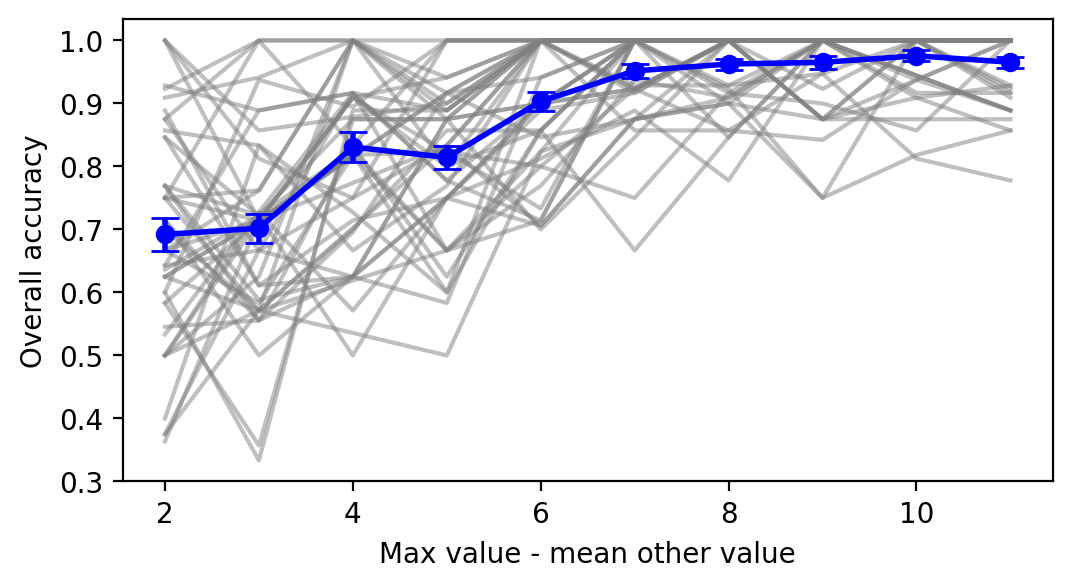

In [33]:
subdf = df.copy()
subdf = subdf[subdf['diff1'] != -1]

per1 = (
    subdf.groupby(['wid','diff1'])['correct_all']
      .mean()
      .reset_index(name='accuracy')
)

# 2. Compute group‐level mean and SEM
stats = (
    per1.groupby('diff1')['accuracy']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot each subject in gray
for _, grp in per1.groupby('wid'):
    ax.plot(grp['diff1'], grp['accuracy'], color='gray', alpha=0.5)

# Overlay group‐level mean ± SEM in black
ax.errorbar(
    stats['diff1'],
    stats['mean'],
    yerr=stats['sem'],
    color='blue',
    marker='o',
    linewidth=2,
    capsize=5
)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('Overall accuracy')
# ax.set_title('First-Stage Accuracy vs. diff1\n'
#              '(Individual subjects: gray; Group mean ± SEM: black)')
plt.show()

In [35]:
def subtree_relation_code(rewards, single_right_idx=2):
    """
    Three‐path tree configuration:
      - Right subtree  = {single_right_idx} (default = 2)
      - Left subtree   = the other two indices
    Returns:
      1 if the best path is the single right‐subtree path
      2 if both best & second‐best are in the left subtree
      3 if both best & worst      are in the left subtree
    """
    # sort indices by reward descending → [best, second, worst]
    best, second, worst = np.argsort(rewards)[::-1]

    # predicate: is this index the single right‐subtree path?
    is_right = lambda i: (i == single_right_idx)

    if is_right(best):
        return 1
    elif (not is_right(best)) and (not is_right(second)):
        return 2
    elif (not is_right(best)) and (not is_right(worst)):
        return 3
    else:
        return np.nan

# Add to your DataFrame
df['subtree_relation'] = df['rewards'].apply(subtree_relation_code)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,best_path_idx,correct1,correct2,correct_all,subtree_relation
0,wdf61453,"[-7, -2, -3]","[-4, -3]","[-3, 2, 0]",2,3,5060.0,1976.0,7036,3.0,3,-1.0,1,False,True,False,3
1,wdf61453,"[-8, -2, 5]","[-4, 4]","[-4, 2, 1]",2,3,2127.0,5453.0,7580,10.0,10,-1.0,2,True,True,True,1
2,wdf61453,"[-5, -3, 5]","[-4, 2]","[-1, 1, 3]",2,3,2495.0,1769.0,4264,9.0,9,-1.0,2,True,True,True,1
3,wdf61453,"[-6, 0, 7]","[-2, 3]","[-4, 2, 4]",2,3,2266.0,1665.0,3931,10.0,10,-1.0,2,True,True,True,1
4,wdf61453,"[2, -2, -6]","[1, -4]","[1, -3, -2]",1,1,3041.0,2981.0,6022,6.0,6,4.0,0,True,True,True,2


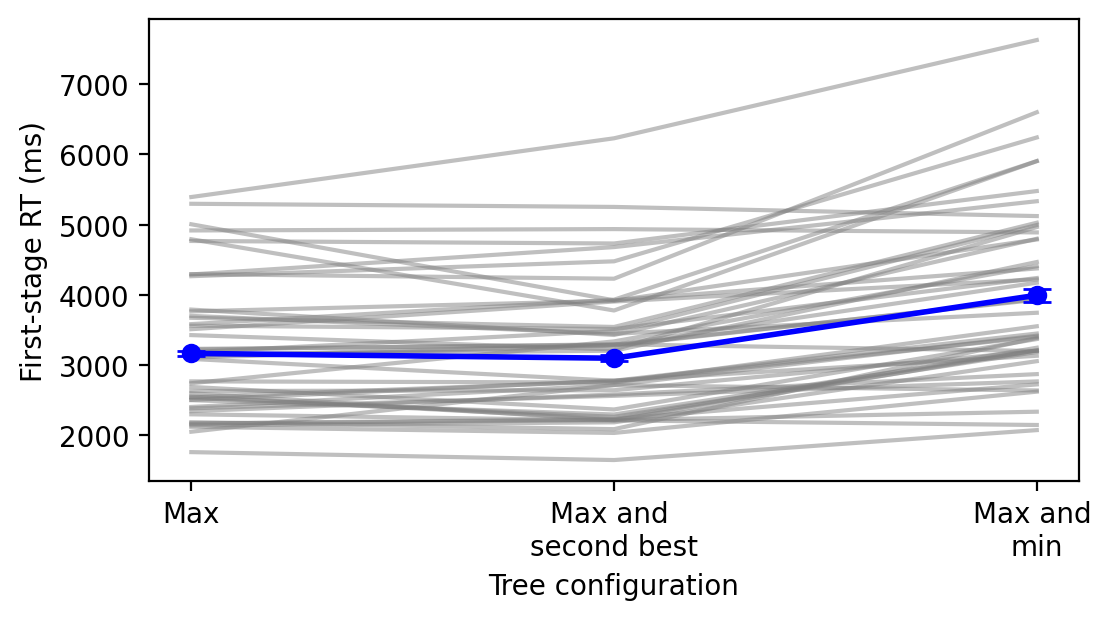

In [36]:
# plot the first stage RT by subtree relation

# Calculate mean and SEM of RT1 for each subtree relation
stats = df.groupby('subtree_relation').agg({
    'rt1': ['mean', 'sem']
}).reset_index()
stats.columns = ['subtree_relation', 'mean', 'sem']

# Create the plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot individual subjects in gray
for _, grp in df.groupby('wid'):
    rt_means = grp.groupby('subtree_relation')['rt1'].mean()
    ax.plot(rt_means.index, rt_means.values, color='gray', alpha=0.5)

# Overlay group-level mean ± SEM in blue
ax.errorbar(
    stats['subtree_relation'],
    stats['mean'], 
    yerr=stats['sem'],
    color='blue',
    marker='o',
    linewidth=2,
    capsize=5
)

ax.set_xlabel('Tree configuration')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Max', 'Max and \nsecond best', 'Max and \nmin'])
ax.set_ylabel('First-stage RT (ms)')
plt.show()
